<a href="https://colab.research.google.com/github/Alice1304/Section2_project/blob/main/0726.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

유권자의 개별특성을 바탕으로 국가 선거 투표/미투표 여부 예측 

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Alice1304/Section2_project/main/train.csv')

In [3]:
df.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [4]:
#결측치 확인 
df.isnull().sum()
#결측치 없음 

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [5]:
#중복데이터 확인
df.duplicated().sum()
#중복데이터 없음

0

In [6]:
#필요한 컬럼들만 사용하여 학습을 진행합니다

In [7]:
df = df[['age_group','education','engnat','familysize','gender','married','race','religion','urban','voted']]
df

,age_group,education,engnat,familysize,gender,married,race,religion,urban,voted
0,30s,2,1,4,Female,3,White,Other,1,2
1,20s,4,2,3,Female,1,Asian,Hindu,3,2
2,30s,3,1,3,Male,2,White,Other,2,1
3,20s,4,2,0,Female,1,Asian,Hindu,3,1
4,20s,3,1,2,Male,2,White,Agnostic,1,1
...,...,...,...,...,...,...,...,...,...,...
45527,10s,2,1,1,Female,1,White,Jewish,3,2
45528,30s,2,1,2,Male,1,White,Atheist,1,2
45529,10s,2,1,1,Female,1,White,Christian_Other,2,1
45530,40s,4,1,2,Male,1,White,Atheist,0,1


In [8]:
df.nunique()
#familysize= 형제자매수, 27개의 고유값들이 있어 분포를 살펴보려 합니다. 

age_group      7
education      5
engnat         3
familysize    27
gender         2
married        4
race           7
religion      12
urban          4
voted          2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


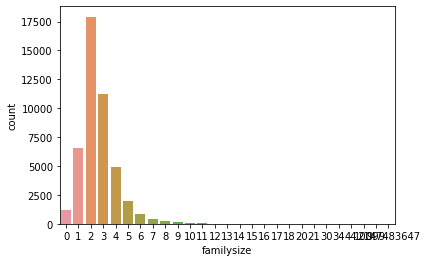

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


x = df['familysize']
x
x.value_counts(normalize=True)
sns.countplot(x);

In [10]:
#familysize의 값 수정  11명 이상은 모두 11명으로 표기 
df.loc[df['familysize']>=11, 'familysize'] = 11

In [11]:
df.replace({'age_group' : {'10s' : 1, '20s': 2, '30s':3, '40s' : 4, '50s' : 5, '60s' :6, '+70s' : 7} ,
            'gender' : {'Female' : 1, 'Male' : 2},
            'race' : {'Asian' : 1,'Arab' :2, 'Black' :3, 'Indigenous Australian' : 4, 'Native American' :5, 'White' :6, 'Other' : 7 },
            'religion' : {'Agnostic' : 1, 'Atheist' : 2, 'Buddhist': 3, 'Christian_Catholic' :4, 'Christian_Mormon':5, 'Christian_Protestant':6, 'Christian_Other':7, 'Hindu':8, 'Jewish':9, 'Muslim':10, 'Sikh':11, 'Other':12}}, inplace = True
)
df

,age_group,education,engnat,familysize,gender,married,race,religion,urban,voted
0,3,2,1,4,1,3,6,12,1,2
1,2,4,2,3,1,1,1,8,3,2
2,3,3,1,3,2,2,6,12,2,1
3,2,4,2,0,1,1,1,8,3,1
4,2,3,1,2,2,2,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...
45527,1,2,1,1,1,1,6,9,3,2
45528,3,2,1,2,2,1,6,2,1,2
45529,1,2,1,1,1,1,6,7,2,1
45530,4,4,1,2,2,1,6,2,0,1


In [12]:
df.nunique()

age_group      7
education      5
engnat         3
familysize    12
gender         2
married        4
race           7
religion      12
urban          4
voted          2
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#평가를 위해 트레인 / 테스트 분리
train, test = train_test_split(df, random_state=2)

In [15]:
train.shape, test.shape 

((34149, 10), (11383, 10))

In [16]:
#타겟을 기준으로 feature / target data 분리 
target = 'voted'
features = df.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [17]:
#분류문제에서는 기준모델을 최빈값으로 설정한다
y_train = train[target]
y_train.value_counts(normalize=True)

2    0.546458
1    0.453542
Name: voted, dtype: float64

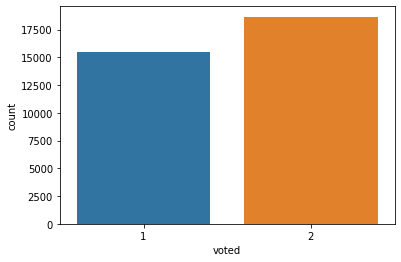

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [19]:
major = y_train.mode()[0]

In [20]:
y_pred = [major] * len(y_train)

In [21]:
#기준모델 정확도 예측 
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5464581686140151


다중선형회귀

타겟인코딩/다중선형회귀사용


In [22]:
#문자형 특성을 사용하기 위한 라벨인코딩 진행 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
X_train_l= X_train.copy()
X_test_l = X_test.copy()

In [25]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    LinearRegression(n_jobs=-1),
)
pipe.fit(X_train_l, y_train)

print('검증세트 정확도', pipe.score(X_test_l, y_test))

y_pred = pipe.predict(X_test_l)

검증세트 정확도 0.16211248983692295


In [26]:
model_lr = pipe.named_steps['linearregression']

In [27]:
pd.Series(model_lr.coef_, features)

age_group    -0.081852
education    -0.126909
engnat       -0.001154
familysize    0.002042
gender       -0.006373
married       0.001373
race         -0.027253
religion      0.003490
urban         0.021470
dtype: float64

In [28]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [29]:
display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,0.207548
1,MAE,0.413869
2,RMSE,0.455574
3,R2,0.162112


In [30]:
test_data = [[1,1,1,10,1,1,1,1,1]]
model_lr.predict(test_data)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.95115082])

In [31]:
#평가지표가 매우 낮게 나타나는 것을 확인함
#그러나, 테스트데이터를 넣었을 때, 투표여부가 명확하게 나타나지 않음 
#다중선형회귀는 사용하지 않는 것으로 결론

로지스틱회귀

In [32]:
X_train_lr= X_train.copy()
X_test_lr=X_test.copy()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [34]:
pipe_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(random_state=1)
)
pipe_lr.fit(X_train_lr, y_train)

y_pred = pipe_lr.predict(X_test_lr)
print('검증 정확도: ', accuracy_score(y_test, y_pred))

검증 정확도:  0.6679258543441975


In [35]:
#로지스틱 회귀 결과 정확도가 기준모델보다 높게 나타남

랜덤포레스트

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X_train_rf= X_train.copy()
X_test_rf=X_test.copy()

In [38]:
from sklearn.metrics import accuracy_score

pipe_r = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=10,  n_jobs=-1, )
)
pipe_r.fit(X_train_rf, y_train)


y_pred = pipe_r.predict(X_test_rf)

print('검증 정확도: ', accuracy_score(y_test, y_pred))


검증 정확도:  0.6536941052446631


XGBOOST

In [39]:
X_train_x= X_train.copy()
X_test_x=X_test.copy()

In [40]:
from xgboost import XGBClassifier

pipe_x = make_pipeline(
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe_x.fit(X_train_x, y_train)

y_pred = pipe_x.predict(X_test_x)

print('검증 정확도: ', accuracy_score(y_test, y_pred))

검증 정확도:  0.6836510585961522


분류모델의 성능 평가

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


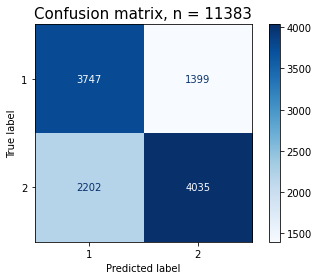

In [41]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_x, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [42]:
cm = pcm.confusion_matrix
cm

array([[3747, 1399],
       [2202, 4035]])

In [43]:
import numpy as np

correct_predictions = np.diag(cm).sum()
correct_predictions

7782

In [44]:
total_predictions = cm.sum()
total_predictions

11383

In [45]:
correct_predictions/total_predictions

0.6836510585961522

In [46]:
print('검증 정확도: ', accuracy_score(y_test, y_pred))

검증 정확도:  0.6836510585961522


In [70]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.6875420034184123